In [1]:
import pandas as pd
results_df = pd.read_csv('results_gauss.csv')

In [2]:
df = results_df 

D:\Users\ivan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.1724e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\Users\ivan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.1724e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\Users\ivan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.1724e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Mean Squared Error:
38756017.66544301


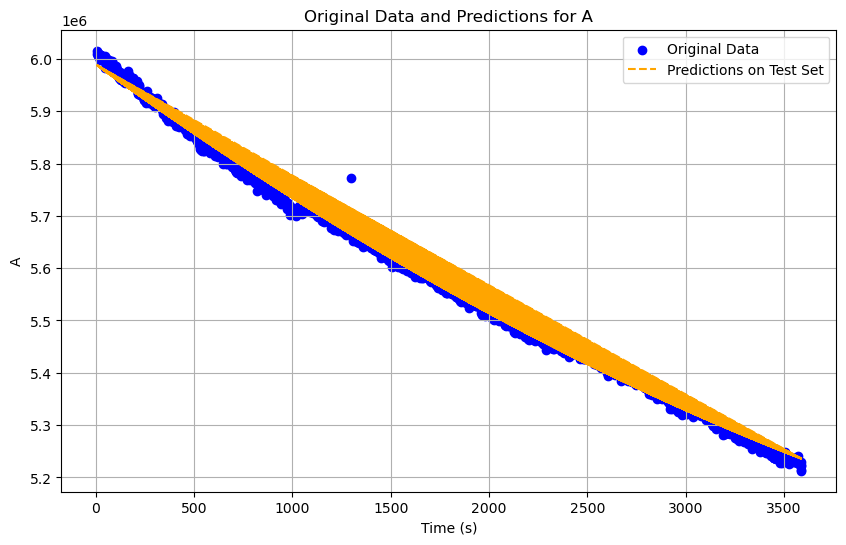

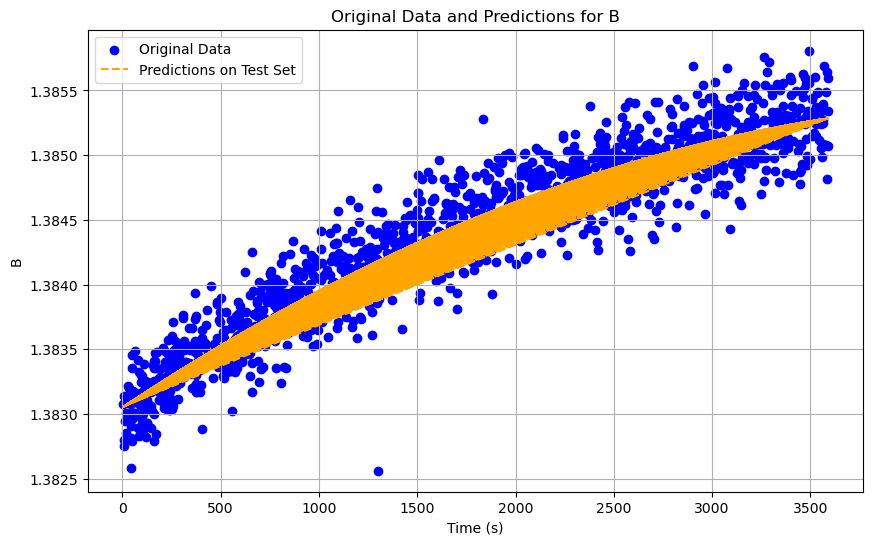

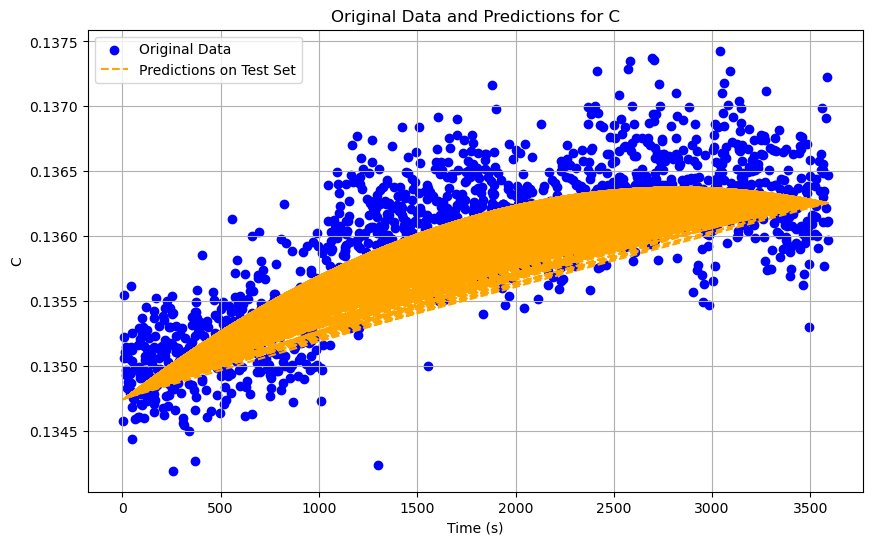

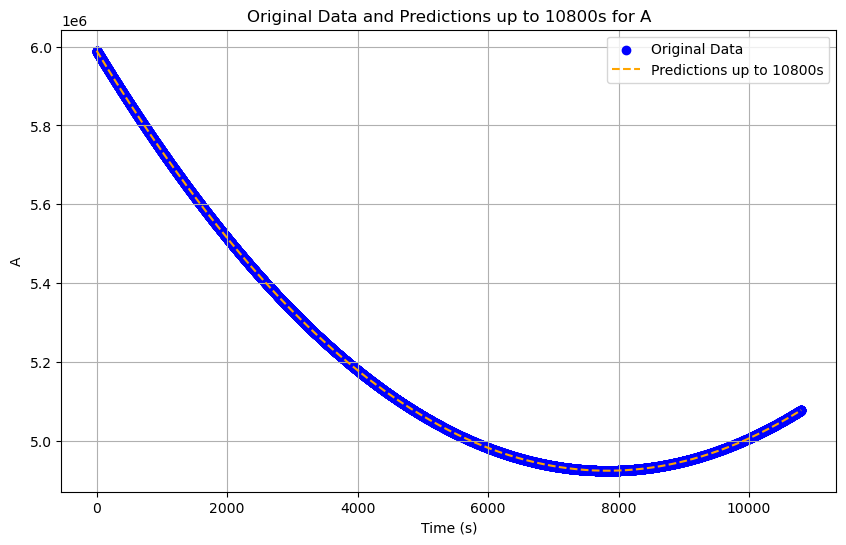

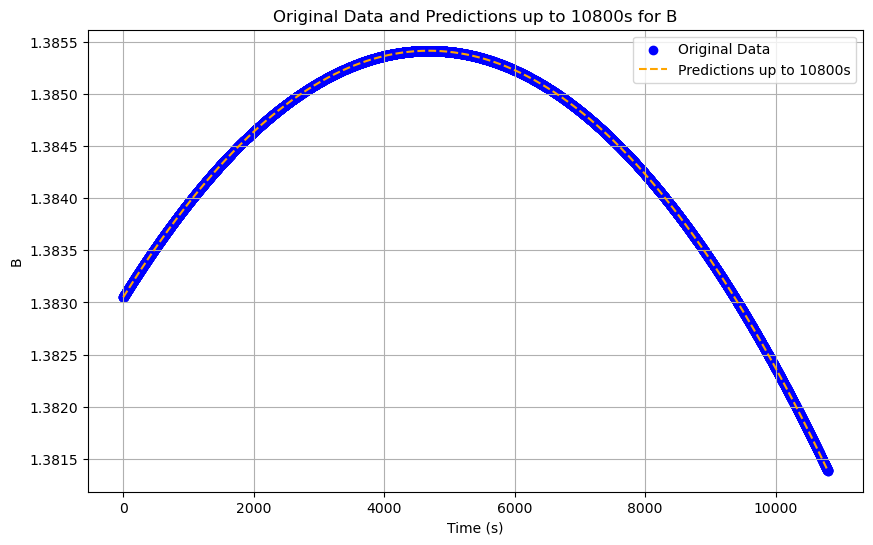

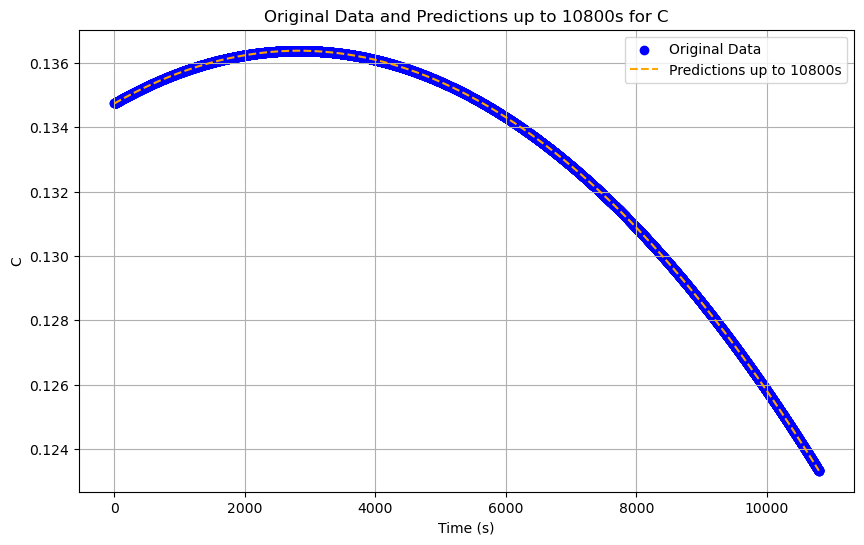

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import TweedieRegressor, PoissonRegressor
from sklearn.linear_model import ElasticNetCV, Ridge
from sklearn.linear_model import Lasso

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

df = results_df 

# Feature columns (excluding 'Time (s)')
features = df[['Time (s)']]

# Target columns (A, B, C)
targets = df[['A', 'B', 'C']]

# Split the data into training and testing sets (80% for training, 20% for testing)
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Train a Polynomial Regression model for each coefficient
models = {}
degree = 2  # Adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)

for target_column in targets.columns:
    # Transform features to polynomial features
    features_train_poly = poly.fit_transform(features_train)
    features_test_poly = poly.transform(features_test)
    
    # Train a Linear Regression model
    model = Ridge() #PoissonRegressor() #Lasso()# TweedieRegressor(power=1, link='log') #ElasticNetCV()
    model.fit(features_train_poly, targets_train[target_column])
    models[target_column] = (model, poly)

# Evaluate the models on the test set
predictions = pd.DataFrame()

for target_column, (model, poly) in models.items():
    features_test_poly = poly.transform(features_test)
    predictions[target_column] = model.predict(features_test_poly)

# Calculate mean squared error for each target
mse = mean_squared_error(targets_test, predictions)
print(f'Mean Squared Error:\n{mse}')

# Train the models on the entire dataset up to 10800s
features_full = pd.DataFrame({'Time (s)': range(10801)})  # Assuming Time starts from 0
predictions_full = pd.DataFrame()

for target_column, (model, poly) in models.items():
    features_full_poly = poly.transform(features_full)
    predictions_full[target_column] = model.predict(features_full_poly)

# Add the predictions back to the original DataFrame
df_full = pd.concat([features_full, predictions_full], axis=1)
df_full.to_excel('df10800.xlsx')
# Plot original data and predictions on the test set
for target_column in targets.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(features_test['Time (s)'], targets_test[target_column], label='Original Data', color='blue')
    plt.plot(features_test['Time (s)'], predictions[target_column], label='Predictions on Test Set', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original Data and Predictions for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot original data and predictions up to 7200s
for target_column in targets.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_full['Time (s)'], df_full[target_column], label='Original Data', color='blue')
    plt.plot(features_full['Time (s)'], predictions_full[target_column], label='Predictions up to 10800s', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original Data and Predictions up to 10800s for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()


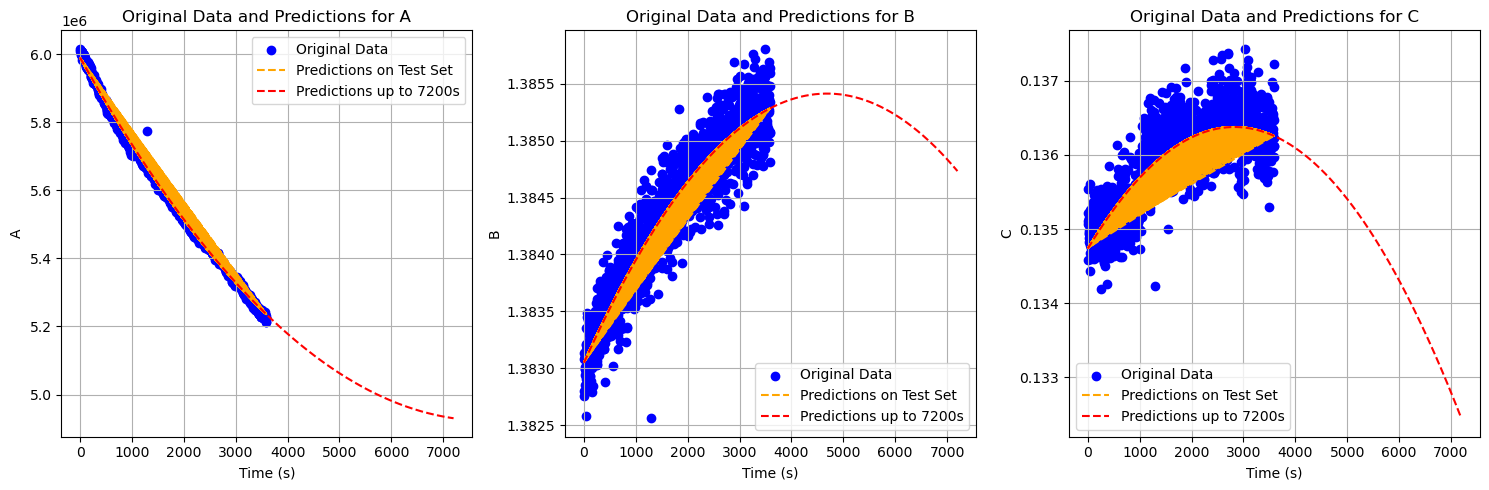

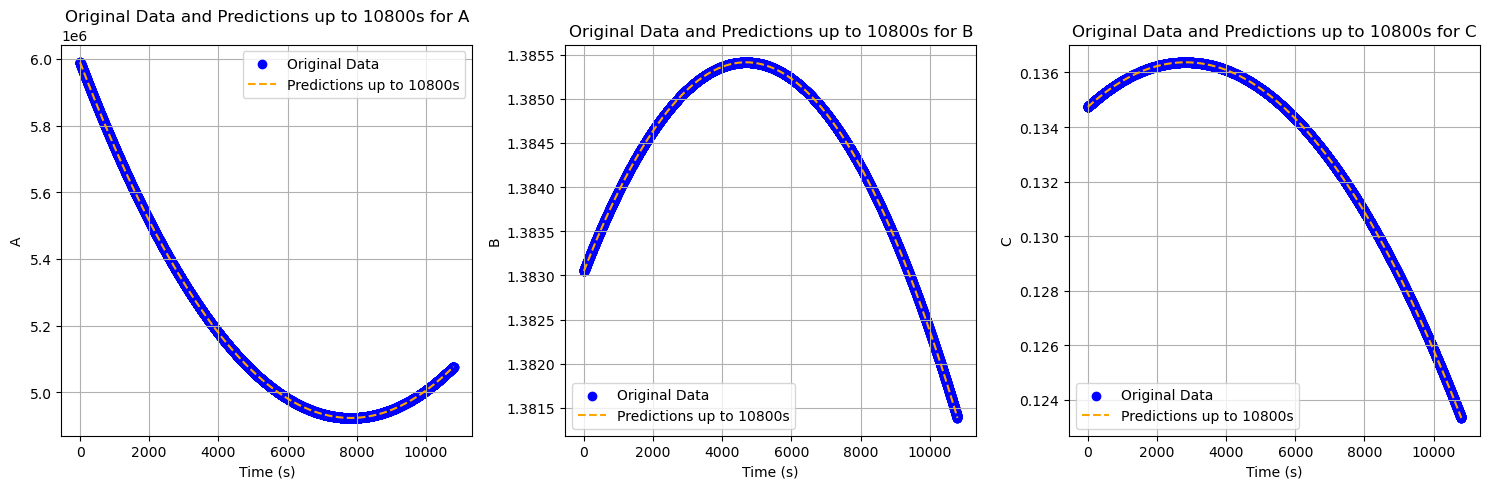

In [17]:
num_targets = len(targets.columns)
num_rows = num_targets // 3 + (num_targets % 3 > 0)
num_cols = min(num_targets, 3)

# Plot original data and predictions on the test set in a dynamic subplot layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), squeeze=False)  # Ensure axs is always a 2D array

for idx, target_column in enumerate(targets.columns):
    row, col = divmod(idx, num_cols)
    ax = axs[row, col]

    ax.scatter(features_test['Time (s)'], targets_test[target_column], label='Original Data', color='blue')
    ax.plot(features_test['Time (s)'], predictions[target_column], label='Predictions on Test Set', linestyle='--', color='orange')
    ax.plot(features_full['Time (s)'][0:7200], predictions_full[target_column][0:7200], label='Predictions up to 7200s', linestyle='--', color='red')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(target_column)
    ax.set_title(f'Original Data and Predictions for {target_column}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig(f'Ridge_2_orig_pred.pdf')
plt.show()

# Plot original data and predictions up to 10800s in a dynamic subplot layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), squeeze=False)  # Ensure axs is always a 2D array

for idx, target_column in enumerate(targets.columns):
    row, col = divmod(idx, num_cols)
    ax = axs[row, col]

    ax.scatter(df_full['Time (s)'], df_full[target_column], label='Original Data', color='blue')
    ax.plot(features_full['Time (s)'], predictions_full[target_column], label='Predictions up to 10800s', linestyle='--', color='orange')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(target_column)
    ax.set_title(f'Original Data and Predictions up to 10800s for {target_column}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig(f'Ridge_2_pred.pdf')
plt.show()

In [11]:
predictions_full

,A,B,C
0,5.805188e+06,1.383732,0.135521
1,5.805188e+06,1.383732,0.135521
2,5.805188e+06,1.383732,0.135521
3,5.805188e+06,1.383732,0.135521
4,5.805187e+06,1.383732,0.135521
...,...,...,...
10796,-4.335785e+05,1.401807,0.146808
10797,-4.347343e+05,1.401810,0.146810
10798,-4.358902e+05,1.401813,0.146812
10799,-4.370462e+05,1.401817,0.146814


In [ ]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import TweedieRegressor
#from scipy.odr import Model, Data, OD
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import Ridge

def normalized_mse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    var_y = np.var(y_true)
    nmse = mse / var_y
    return nmse

def mean_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Avoid division by zero
    non_zero_indices = y_true != 0
    y_true_non_zero = y_true[non_zero_indices]
    y_pred_non_zero = y_pred[non_zero_indices]
    
    mpe = abs(np.mean((y_true_non_zero - y_pred_non_zero) / y_true_non_zero) * 100)
    return mpe

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse


def train_knn(X_train, y_train):
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    return model

def train_lasso(X_train, y_train):
    model = Lasso()
    model.fit(X_train, y_train)
    return model

def train_elastic_net(X_train, y_train):
    model = ElasticNet()
    model.fit(X_train, y_train)
    return model

def train_decision_tree(X_train, y_train):
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    return model

def train_bagging(X_train, y_train):
    model = BaggingRegressor()
    model.fit(X_train, y_train)
    return model

def train_adaboost(X_train, y_train):
    model = AdaBoostRegressor()
    model.fit(X_train, y_train)
    return model

def train_xgboost(X_train, y_train):
    model = XGBRegressor()
    model.fit(X_train, y_train)
    return model

def train_svr(X_train, y_train):
    model = SVR()
    model.fit(X_train, y_train)
    return model

def train_gradient_boosting(X_train, y_train):
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    return model

def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def train_random_forest(X_train, y_train):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    return model

def train_ridge(X_train, y_train):
    model = Ridge()
    model.fit(X_train, y_train)
    return model


def train_lasso_lars(X_train, y_train):
    model = LassoLars()
    model.fit(X_train, y_train)
    return model

def train_huber(X_train, y_train):
    model = HuberRegressor()
    model.fit(X_train, y_train)
    return model

def train_ransac(X_train, y_train):
    model = RANSACRegressor()
    model.fit(X_train, y_train)
    return model

def train_svr_linear(X_train, y_train):
    model = SVR(kernel='linear')
    model.fit(X_train, y_train)
    return model

def train_svr_poly(X_train, y_train):
    model = SVR(kernel='poly')
    model.fit(X_train, y_train)
    return model

def train_svr_rbf(X_train, y_train):
    model = SVR(kernel='rbf')
    model.fit(X_train, y_train)
    return model

def train_elastic_net_cv(X_train, y_train):
    model = ElasticNetCV()
    model.fit(X_train, y_train)
    return model

def train_omp(X_train, y_train):
    model = OrthogonalMatchingPursuit()
    model.fit(X_train, y_train)
    return model


def train_tweedie(X_train, y_train):
    model = TweedieRegressor()
    model.fit(X_train, y_train)
    return model

def train_gaussian_process(X_train, y_train):
    model = GaussianProcessRegressor()
    model.fit(X_train, y_train)
    return model

def train_passive_aggressive(X_train, y_train):
    model = PassiveAggressiveRegressor()
    model.fit(X_train, y_train)
    return model

def train_isotonic_regression(X_train, y_train):
    model = IsotonicRegression()
    model.fit(X_train, y_train)
    return model

def train_kernel_ridge(X_train, y_train):
    model = KernelRidge()
    model.fit(X_train, y_train)
    return model

def train_catboost(X_train, y_train):
    model = CatBoostRegressor()
    model.fit(X_train, y_train)
    return model

def train_lightgbm(X_train, y_train):
    model = LGBMRegressor()
    model.fit(X_train, y_train)
    return model

def train_hist_gradient_boosting(X_train, y_train):
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)
    return model

def train_bayesian_ridge(X_train, y_train):
    model = BayesianRidge()
    model.fit(X_train, y_train)
    return model

def train_passive_aggressive_hinge(X_train, y_train):
    model = PassiveAggressiveRegressor(loss='epsilon_insensitive')
    model.fit(X_train, y_train)
    return model

def train_extra_trees(X_train, y_train):
    model = ExtraTreesRegressor()
    model.fit(X_train, y_train)
    return model

def train_stacking(X_train, y_train, base_models, final_model):
    model = StackingRegressor(estimators=base_models, final_estimator=final_model)
    model.fit(X_train, y_train)
    return model

def train_theil_sen(X_train, y_train):
    model = TheilSenRegressor()
    model.fit(X_train, y_train)
    return model

def train_poisson(X_train, y_train):
    model = PoissonRegressor()
    model.fit(X_train, y_train)
    return model

def train_glm(X_train, y_train):
    model = TweedieRegressor(power=1, link='log')
    model.fit(X_train, y_train)
    return model


'''def train_odr(X_train, y_train):
    def linear_model(B, x):
        return B[0] * x + B[1]
    
    model = Model(linear_model)
    data = Data(X_train, y_train)
    odr = ODR(data, model, beta0=[1.0, 0.0])
    result = odr.run()
    return result'''

def train_quantile_regression(X_train, y_train, quantile=0.5):
    model = QuantReg(y_train, X_train)
    result = model.fit(q=quantile)
    return result

def train_gamma(X_train, y_train):
    model = GammaRegressor()
    model.fit(X_train, y_train)
    return model

# List of models and their names
models = [
   # train_knn,
    #train_lasso,
    #train_elastic_net,
    #train_decision_tree,
    #train_bagging,
    #train_adaboost,
    #train_xgboost,
    #train_svr,
    #train_gradient_boosting,
    #train_linear_regression,
    #train_random_forest,
    ##train_ridge,
    ##train_lasso_lars,
    ##train_huber,
    #train_ransac,
    #train_svr_linear,
   # train_svr_poly,
   # train_svr_rbf,
   #train_elastic_net_cv,
    #train_omp,
    #train_tweedie,
    #train_gaussian_process,
    #train_passive_aggressive,
    #train_isotonic_regression,
    #train_kernel_ridge,**
    #train_catboost,
    train_lightgbm,
    #train_hist_gradient_boosting,
    #train_bayesian_ridge,
    #train_passive_aggressive_hinge,
   # train_extra_trees,
    #train_stacking, **#
    train_theil_sen,
    train_poisson,
    train_glm,
    #train_odr,
    train_quantile_regression,
    train_gamma
]

model_names = [
   # 'KNeighborsRegressor',
  #  'Lasso',
   # 'Elastic Net',
  #  'Decision Tree',
  #  'Bagging',
  #  'AdaBoost',
   # 'XGBoost',
    #'SVR',
   # 'Gradient Boosting',
   # 'Linear Regression',
    #'Random Forest',
   # 'Ridge',
    #'LassoLars',
    #'Huber', **
    #'RANSAC',
    #'SVR Linear',**
  #  'SVR Poly',
   # 'SVR RBF',
  #  'Elastic Net CV',
   # 'OMP',
   # 'Tweedie',
   # 'Gaussian Process',
   # 'Passive Aggressive',
    #'Isotonic Regression', **
    #'Kernel Ridge', **
    #'CatBoost',
    #'LightGBM',
    #'Hist Gradient Boosting',
    #'Bayesian Ridge',
    #'PA Hinge',
    #'Extra Trees',
    #'Stacking',
    'Theil-Sen',
    'Poisson',
    'GLM',
    #'ODR',
    'Quantile Regression',
    'Gamma'
]


# Iterate over models
for train_model, model_name in zip(models, model_names):
    
    # Specify the directory and file name
    model_directory = f'{model_name}'
    
    # Create the directory if it doesn't exist
    os.makedirs(model_directory, exist_ok=True)
    
    # Feature columns (excluding 'Time (s)')
    features = df[['Time (s)']]

    # Target columns (A, B, C)
    targets = df[['A', 'B', 'C']]

    # Split the data into training and testing sets (80% for training, 20% for testing)
    features_train, features_test, targets_train, targets_test = train_test_split(
        features, targets, test_size=0.2, random_state=42
    )

    mse_list = []
    r2_list = []
    rmse_list = []
    nmse_list = []
    mae_list = []
    mpe_list = []
    degree_list = []
    
    # Train a Polynomial Regression model for each coefficient
    all_models = {}
    degrees = range(2,10)  # Adjust the degree of the polynomial
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)

        for target_column in targets.columns:
            # Transform features to polynomial features
            features_train_poly = poly.fit_transform(features_train)
            features_test_poly = poly.transform(features_test)

            # Train a Regression model
            model = train_model(features_train_poly, targets_train[target_column])
            all_models[target_column] = (model, poly)

        # Evaluate the models on the test set
        predictions = pd.DataFrame()

        for target_column, (model, poly) in all_models.items():
            features_test_poly = poly.transform(features_test)
            predictions[target_column] = model.predict(features_test_poly)

        # Calculate mean squared error for each target
        mse = mean_squared_error(targets_test, predictions)
        r2 = r2_score(targets_test, predictions)
        rmse = root_mean_squared_error(targets_test, predictions)
        nmse = normalized_mse(targets_test, predictions)
        mae = mean_absolute_error(targets_test, predictions)
        mpe = mean_percentage_error(targets_test, predictions)
        
        degree_list.append(degree)
        mse_list.append(mse)
        r2_list.append(r2)
        rmse_list.append(rmse)
        nmse_list.append(nmse)
        mae_list.append(mae)
        mpe_list.append(mpe)
        
        res_metrics = pd.DataFrame({
            'Degree': degree_list,
            'MSE': mse_list,
            'R2': r2_list,
            'RMSE': rmse_list,
            'NMSE': nmse_list,
            'MAE': mae_list,
            'MPE': mpe_list,
        })
        
        # Save the results to an Excel file
        with pd.ExcelWriter(f'{model_directory}/metrics_{model_name}.xlsx', engine='openpyxl', mode='w') as writer:
            res_metrics.to_excel(writer, sheet_name='Results', index=False)
        
        print(f'Mean Squared Error:\n{mse}')

        # Train the models on the entire dataset up to 7200s
        features_full = pd.DataFrame({'Time (s)': range(10801)})  # Assuming Time starts from 0
        predictions_full = pd.DataFrame()

        for target_column, (model, poly) in all_models.items():
            features_full_poly = poly.transform(features_full)
            predictions_full[target_column] = model.predict(features_full_poly)

        # Add the predictions back to the original DataFrame
        df_full = pd.concat([features_full, predictions_full], axis=1)

        df_full.to_excel(f'{model_directory}/{model_name}_{degree}.xlsx')

        # Plot original data and predictions on the test set
        for target_column in targets.columns:
            plt.figure(figsize=(10, 6))
            plt.scatter(features_test['Time (s)'], targets_test[target_column], label='Original Data', color='blue')
            plt.plot(features_test['Time (s)'], predictions[target_column], label='Predictions on Test Set', linestyle='--', color='orange')
            plt.xlabel('Time (s)')
            plt.ylabel(target_column)
            plt.title(f'Original Data and Predictions by PolynomialFeatures (degree={degree}) for {target_column} ({model_name})')
            plt.legend()
            plt.grid(True)
            plt.savefig(f'{model_directory}/{model_name}_{target_column}_{degree}_3600.png')
            plt.show()

        # Plot original data and predictions up to 7200s
        for target_column in targets.columns:
            plt.figure(figsize=(10, 6))
            plt.scatter(df_full['Time (s)'].loc[0:7200], df_full[target_column].loc[0:7200], label='Original Data', color='blue')
            plt.plot(features_full['Time (s)'].loc[0:7200], predictions_full[target_column].loc[0:7200], label='Predictions up to 7200s', linestyle='--', color='orange')
            plt.xlabel('Time (s)')
            plt.ylabel(target_column)
            plt.title(f'Original Data and Predictions up to 7200s by PolynomialFeatures (degree={degree}) for {target_column} ({model_name})')
            plt.legend()
            plt.grid(True)
            plt.savefig(f'{model_directory}/{model_name}_{target_column}_{degree}_7200.png')
            plt.show()
        
        
        # Plot original data and predictions up to 10800s
        for target_column in targets.columns:
            plt.figure(figsize=(10, 6))
            plt.scatter(df_full['Time (s)'], df_full[target_column], label='Original Data', color='blue')
            plt.plot(features_full['Time (s)'], predictions_full[target_column], label='Predictions up to 10800s', linestyle='--', color='orange')
            plt.xlabel('Time (s)')
            plt.ylabel(target_column)
            plt.title(f'Original Data and Predictions up to 10800s by PolynomialFeatures (degree={degree}) for {target_column} ({model_name})')
            plt.legend()
            plt.grid(True)
            plt.savefig(f'{model_directory}/{model_name}_{target_column}_{degree}_10800.png')
            plt.show()
